### Solution to Problem 2 (Given)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

accepted new steps: 78471
median of samples: 1.99
68% confidence interval (relative to median): [-1.40,1.40]
95.5% confidence interval (relative): [-2.83,2.82]


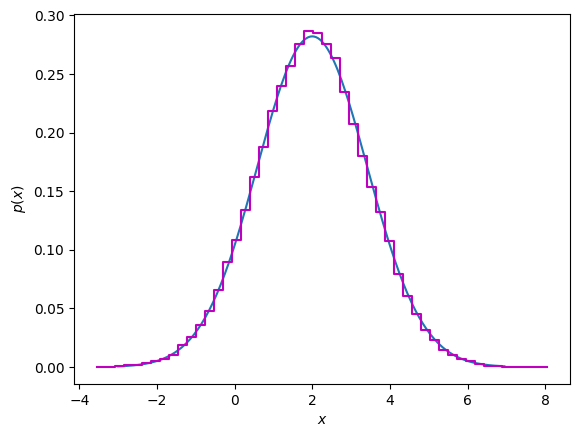

In [82]:
# initialize random number generator:
my_randState=np.random.RandomState(seed=1010101)

def sample_f(x, mu, sig):
    # per instructions, use a posterior (density function) that is a Gaussian
    return np.exp(-(x-mu)**2/2/sig**2)/np.sqrt(2*np.pi*sig**2)

nsteps=10**5
x0=0
samples=np.zeros(nsteps)
xi=x0
sqrt2=np.sqrt(2)
uniforms=my_randState.random(nsteps)
count=0
for i in range(nsteps):
    # evaluate at present step
    pnow=sample_f(xi, 2, sqrt2)
    # get next (proposed) step
    # 
    # Note: here I'm drawing for the *change* in the position relative to the
    # current step. I could draw for the new step iteslf here, then it wouldn't
    # be delta_x, it would be xnew=xi+delta_x and the call would be
    # xnew=np.random.normal(loc=xi, scale=1)) and I'd set xi=xnew in the if
    # statement below:
    deltax=my_randState.normal(loc=0, scale=1)
    # evaluate at future step
    pnext=sample_f(xi+deltax, 2, sqrt2)
    if pnext / pnow > uniforms[i]:
        xi += deltax
        count += 1
        
    samples[i]=xi
        
xvals=np.r_[-3:7:0.05]
plt.plot(xvals, sample_f(xvals, 2, sqrt2))

# h1=mbk.hist(samples, nbins=50, normed=True, for_plot=True)
# plot(h1[0], h1[1], 'k-')
h1=np.histogram(samples, bins=50, density=True)
# plot at bin edges (so it's piecewise constant), not central value
hx=np.zeros(h1[0].size*2)
hy=np.zeros(h1[0].size*2)
hx[::2]=h1[1][:-1]
hx[1::2]=h1[1][1:]
hy[::2]=h1[0]
hy[1::2]=h1[0]
plt.plot(hx, hy, 'm-')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

# # alternate: plot at bin centers. Need to translate x values from bin edges to
# # bin centers:
# plot(h1[1][:-1]+np.diff(h1[1])/2, h1[0], 'm-')
print(f'accepted new steps: {count}')

# we can also get confidence intervals directly from the samples:
ci_1sig=np.percentile(samples,np. r_[16, 84])
ci_2sig=np.percentile(samples, np.r_[2.25, 97.75])
samples_med=np.percentile(samples, np.r_[50])
samples_mean=samples.sum()/samples.size

# for this example, the 68% confidence interval should be approximately +/- the
# standard deviation (sqrt 2=1.41) and the 95.5% confidence interval should be
# approximately twice as large:
ci_1sig_rel=ci_1sig-samples_med
ci_2sig_rel=ci_2sig-samples_med

print(f'median of samples: {samples_med[0]:.2f}')
print(f'68% confidence interval (relative to median): [{ci_1sig_rel[0]:.2f},{ci_1sig_rel[1]:.2f}]')
print(f'95.5% confidence interval (relative): [{ci_2sig_rel[0]:.2f},{ci_2sig_rel[1]:.2f}]')


### Solution to Problem 10

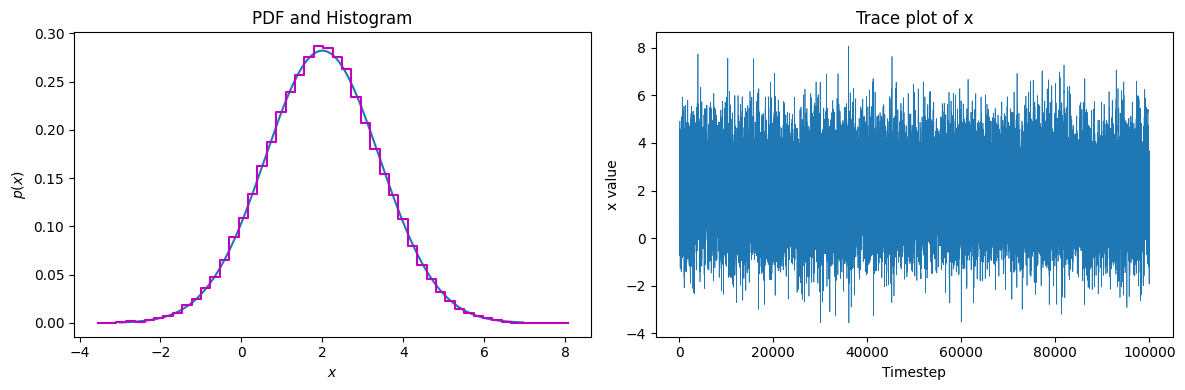


Empirical means and variances for each quarter:
 Quarter 1: mean = 1.9697, variance = 1.9999
 Quarter 2: mean = 1.9956, variance = 2.0182
 Quarter 3: mean = 2.0199, variance = 1.9018
 Quarter 4: mean = 1.9807, variance = 2.0257


In [83]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(xvals, sample_f(xvals, 2, sqrt2))

#plot histogram and PDF
plt.plot(hx, hy, 'm-')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.title('PDF and Histogram')


# Plot x chain vs timestep 
plt.subplot(1, 2, 2)
plt.plot(samples, lw=0.5)
plt.xlabel('Timestep')
plt.ylabel('x value')
plt.title('Trace plot of x')

plt.tight_layout()
plt.show()

# splitting chain into four quarters
quarter = nsteps // 4
quarters = [samples[i*quarter:(i+1)*quarter] for i in range(4)]
print("\nEmpirical means and variances for each quarter:")
for i, q in enumerate(quarters):
    mean_q = np.mean(q)
    var_q = np.var(q)
    print(f" Quarter {i+1}: mean = {mean_q:.4f}, variance = {var_q:.4f}")

I would conclude from this that convergence must have happened very quickly (or not at all, though less likely), as we can see no evidence of a burn-in phase.

### Solution to Problem 11

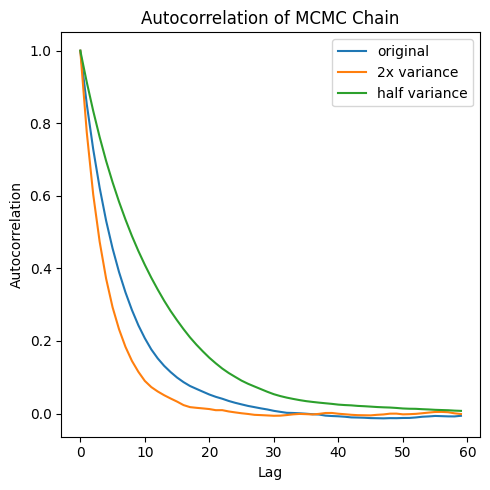

In [101]:
def autocorrelation_fft(x):
    
    x = x - np.mean(x)
    n = len(x)
    f = np.fft.fft(x, n=2*n)
    acf = np.fft.ifft(f * np.conjugate(f))
    #normalize
    acf /= acf[0] 
    
    return acf

#for wider distribution
samplestwice=np.zeros(nsteps)
xi=x0
count=0
for i in range(nsteps):
    # evaluate at present step
    pnow=sample_f(xi, 2, sqrt2)
    # get next (proposed) step
    deltax=my_randState.normal(loc=0, scale=sqrt2)
    # evaluate at future step
    pnext=sample_f(xi+deltax, 2, sqrt2)
    if pnext / pnow > uniforms[i]:
        xi += deltax
        count += 1
        
    samplestwice[i]=xi

#for narrower distribution
sampleshalf=np.zeros(nsteps)
xi=x0
count=0
for i in range(nsteps):
    # evaluate at present step
    pnow=sample_f(xi, 2, sqrt2)
    # get next (proposed) step
    deltax=my_randState.normal(loc=0, scale=sqrt(0.5))
    # evaluate at future step
    pnext=sample_f(xi+deltax, 2, sqrt2)
    if pnext / pnow > uniforms[i]:
        xi += deltax
        count += 1
        
    sampleshalf[i]=xi

# Compute and plot the autocorrelation
acf = autocorrelation_fft(samples)
acftwice = autocorrelation_fft(samplestwice)
acfhalf = autocorrelation_fft(sampleshalf)

plt.figure(figsize=(5, 5))
plt.plot(acf[:60], label = "original")
plt.plot(acftwice[:60], label = "2x variance")
plt.plot(acfhalf[:60], label = "half variance")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of MCMC Chain")
plt.tight_layout()
plt.legend()
plt.show()


This makes sense. As the variance increases, the autocorrelation length decreases. This is because the samples are allowed to jump farther at each
step, letting them reach much different values more quickly, manifesting in a shorter autocorrelation length.

### Solution to Problem 9

accepted new steps: 44547
median of samples: 2.84
68% confidence interval (relative to median): [-1.15,1.24]
95.5% confidence interval (relative): [-2.08,2.59]


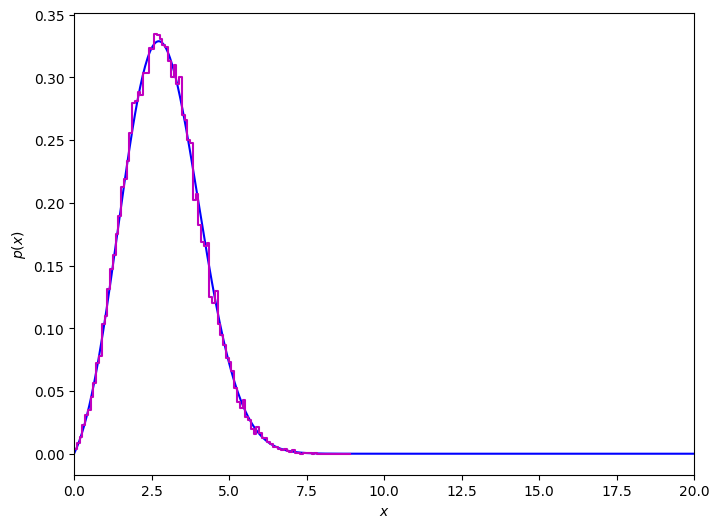

In [71]:

# initialize random number generator:
my_randState=np.random.RandomState(seed=1010101)

def sample_f(x, mu, sig):
    # per instructions, use a posterior (density function) that is a Gaussian (now times x for the new log-skewed distribution)
    return np.exp(-(x-mu)**2/2/sig**2)/np.sqrt(2*np.pi*sig**2)*x

nsteps=10**5

#start at 1 to not mess up the log
x0=1
samples=np.zeros(nsteps)
xi=x0
sqrt2=np.sqrt(2)
uniforms=my_randState.random(nsteps)
count=0
lnxi = np.log(xi)  

for i in range(nsteps):
     # evaluate at present step
    pnow = sample_f(xi, 2, sqrt2)
    
     # get next (proposed) step
    deltalnx = my_randState.normal(loc=0, scale=1)
    lnxi_new = lnxi + deltalnx
    
    # new x
    xnew = np.exp(lnxi_new) 
    # evaluate at future step
    pnext = sample_f(xnew, 2, sqrt2)

    #new acceptance ratio to reflect the jacobian
    ratio = (pnext * xnew) / (pnow * xi)
    if ratio > uniforms[i]:
        lnxi = lnxi_new  # accept move
        xi = xnew
        count += 1

    samples[i] = xi

# Define plot range to match Figure 4 (x from 0 to ~20)
xvals = np.linspace(0.01, 20, 500)
unnorm = sample_f(xvals, 2, sqrt2)

#normalize
norm = np.trapz(unnorm, xvals)
analytic_density = unnorm / norm

plt.figure(figsize=(8, 6))
# Plot histogram of MCMC samples
h1 = np.histogram(samples, bins=100, density=True)

plt.plot(xvals, analytic_density, 'b-', label='Analytic target density')
plt.xlim(0, 20)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

# plot at bin edges (so it's piecewise constant), not central value
hx=np.zeros(h1[0].size*2)
hy=np.zeros(h1[0].size*2)
hx[::2]=h1[1][:-1]
hx[1::2]=h1[1][1:]
hy[::2]=h1[0]
hy[1::2]=h1[0]
plt.plot(hx, hy, 'm-')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

# # alternate: plot at bin centers. Need to translate x values from bin edges to
# # bin centers:
# plot(h1[1][:-1]+np.diff(h1[1])/2, h1[0], 'm-')
print(f'accepted new steps: {count}')

# we can also get confidence intervals directly from the samples:
ci_1sig=np.percentile(samples,np. r_[16, 84])
ci_2sig=np.percentile(samples, np.r_[2.25, 97.75])
samples_med=np.percentile(samples, np.r_[50])
samples_mean=samples.sum()/samples.size

# for this example, the 68% confidence interval should be approximately +/- the
# standard deviation (sqrt 2=1.41) and the 95.5% confidence interval should be
# approximately twice as large:
ci_1sig_rel=ci_1sig-samples_med
ci_2sig_rel=ci_2sig-samples_med

print(f'median of samples: {samples_med[0]:.2f}')
print(f'68% confidence interval (relative to median): [{ci_1sig_rel[0]:.2f},{ci_1sig_rel[1]:.2f}]')
print(f'95.5% confidence interval (relative): [{ci_2sig_rel[0]:.2f},{ci_2sig_rel[1]:.2f}]')


The new distribution I am sampling from is now the old gaussian g(x) times x. That is, my new distribution is g(x)*x. This is reflected in the code changes above.